### 本案例针对kaggle上提供的某金融机构的历史贷款数据, 建立相应的模型用于预测贷款违约的行为, 期望在发放贷款前能够对贷款违约的风险作出衡量和预测, 更加明晰地明确影响贷款违约风险的特征.

##### 本案例所引用数据的变量如下:
age: 年龄  
debt ratio: 债务与收入的比率  
monthly income: 月收入  
number of dependents: 需抚养的其他人的数量  
number of open credit lines and loans: 开放贷款和信用贷款的数量  
revolving utilization of unsecured lines: 信用贷款总额占总贷款的比率  
number real estate loans or lines: 抵押贷款的次数  
number of times 30-59 days past due not worse: 过去两年中借款人逾期30-59天的次数  
number of times 60-89 days past due not worse: 过去两年中借款人逾期60-89天以上的次数  
number of times 90 days late: 过去两年中借款人逾期90天以上的次数  
serious dlqin2yrs: 是否违约  

##### 用户画像:
影响贷款违约的因素有:  
用户的自身特质: 用户的年龄  
用户的经济情况: 收入, 债务比, 信用贷款的比率, 抵押贷款的数量  
用户的其他压力: 社会中需要抚养的人数, 含孩子等  
用户的征信情况: 历史逾期次数  

#### 思考:
需要补充考虑贷款违约的影响因素有:   
1. 用户的性别(性别差异对违约意愿是否有影响)
2. 是否已婚(对于已婚的人可能会具备较强的家庭责任感)
3. 用户的职业(虽然较为难以统计, 但是不同职业的具备不同的特质, 可能会对贷款违约产生一定的影响)
4. 用户的教育程度
5. 用户的借款频数随时间的分布情况(或许可以判断出用户的用款需求随时间变化的情况) 

#### 使用pandas和matplotlib图表进行描述性统计分析

是否违约与年龄的分布情况  
是否违约与征信历史逾期情况  
是否违约与债务比, 收入情况  
是否违约与抚养人数  
是否违约与信用贷款和抵押贷款  

In [1]:
#数据准备
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan

In [14]:
df = pd.read_csv('./data/cs-training.csv')

In [3]:
#查看数据
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [4]:
df.shape

(150000, 12)

In [5]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
#数据清洗
#处理重复数据, 发现没有重复数据
df[df.duplicated()]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


In [15]:
#处理异常值
df['age']=df['age'].replace(0.0,np.nan)
df[df['age']==0]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


In [16]:
df['NumberOfTime30-59DaysPastDueNotWorse']=df['NumberOfTime30-59DaysPastDueNotWorse'].replace([96, 98],np.nan)
df['NumberOfTime60-89DaysPastDueNotWorse']=df['NumberOfTime60-89DaysPastDueNotWorse'].replace([96, 98],np.nan)
df['NumberOfTimes90DaysLate']=df['NumberOfTimes90DaysLate'].replace([96, 98],np.nan)
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,149999.000000,149731.000000,150000.000000,1.202690e+05,150000.000000,149731.000000,150000.000000,149731.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295555,0.245794,353.005076,6.670221e+03,8.452760,0.090456,1.018240,0.064823,0.757222
std,43301.414527,0.249746,249.755371,14.771298,0.697780,2037.818523,1.438467e+04,5.145951,0.485527,1.129771,0.330073,1.115086
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,13.000000,329664.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


In [17]:
#处理缺失值
df = df.fillna(df.median())
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45.0,2.0,0.802982,9120.0,13,0.0,6,0.0,2.0
1,2,0,0.957151,40.0,0.0,0.121876,2600.0,4,0.0,0,0.0,1.0
2,3,0,0.658180,38.0,1.0,0.085113,3042.0,2,1.0,0,0.0,0.0
3,4,0,0.233810,30.0,0.0,0.036050,3300.0,5,0.0,0,0.0,0.0
4,5,0,0.907239,49.0,1.0,0.024926,63588.0,7,0.0,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74.0,0.0,0.225131,2100.0,4,0.0,1,0.0,0.0
149996,149997,0,0.299745,44.0,0.0,0.716562,5584.0,4,0.0,1,0.0,2.0
149997,149998,0,0.246044,58.0,0.0,3870.000000,5400.0,18,0.0,1,0.0,0.0
149998,149999,0,0.000000,30.0,0.0,0.000000,5716.0,4,0.0,0,0.0,0.0


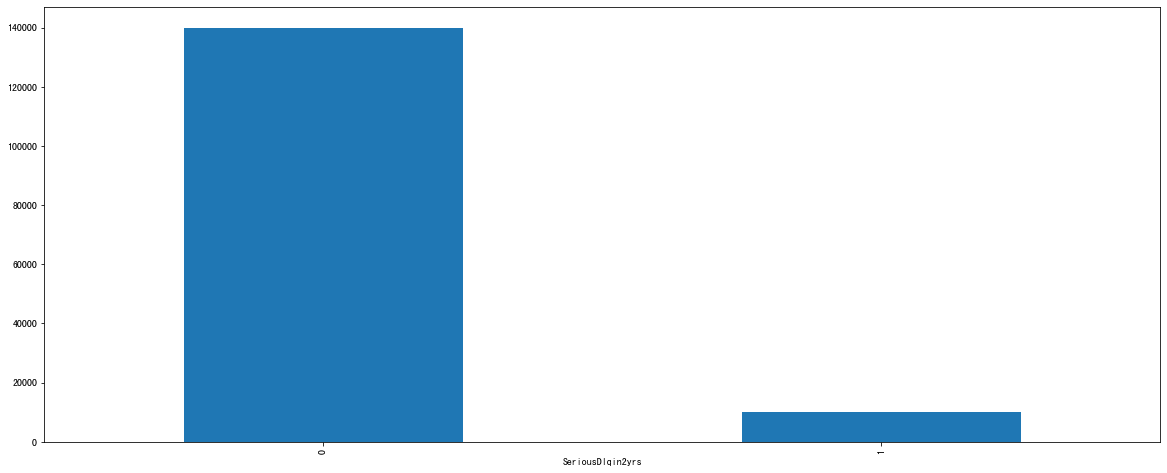

In [18]:
#查看违约用户和未违约用户的数量对比
count = df.groupby(['SeriousDlqin2yrs']).count()
count['DebtRatio'].plot(kind='bar', figsize=(20, 8))
plt.show()

#### 由上述图片可以看出,违约用户的数量大概有一万, 未违约用户的数量大概有14万左右, 非常明显的是这是一个不平衡数据样本.

In [19]:
#查看违约情况与用户年龄的分布表
t1 = pd.crosstab(df['SeriousDlqin2yrs'], df['age'])
stu = ['未违约', '违约']
t1.index=stu
t1

age,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,...,96.0,97.0,98.0,99.0,101.0,102.0,103.0,105.0,107.0,109.0
未违约,170,398,571,718,832,1046,1172,1355,1523,1728,...,18,17,6,7,2,3,3,1,1,2
违约,13,36,70,98,121,147,166,205,179,209,...,0,0,0,2,1,0,0,0,0,0


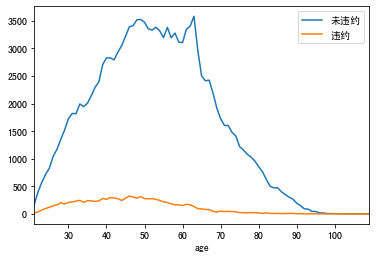

In [20]:
#是否违约与年龄的分布情况
t1.T.plot()
plt.show()

In [21]:
#是否违约与征信历史逾期情况的条形图/扇形图
t2 = pd.crosstab(df['SeriousDlqin2yrs'], df['NumberOfTime30-59DaysPastDueNotWorse'])
t3 = pd.crosstab(df['SeriousDlqin2yrs'], df['NumberOfTime60-89DaysPastDueNotWorse'])
t4 = pd.crosstab(df['SeriousDlqin2yrs'], df['NumberOfTimes90DaysLate'])
stu = ['未违约', '违约']
t2.index=stu
t2

NumberOfTime30-59DaysPastDueNotWorse,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
未违约,121099,13624,3379,1136,429,188,66,26,17,8,1,0,1,0
违约,5188,2409,1219,618,318,154,74,28,8,4,3,1,1,1


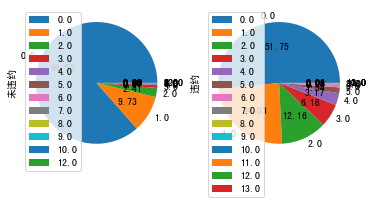

In [22]:
#是否违约与用户在30-59天之内的逾期次数影响关系
t2.T.plot(kind='pie', autopct='%1.2f', subplots=True)
plt.show()

#### 由上图可以看到, 违约和未违约的用户相比较, 在30-59天之内逾期次数为0的用户占到了未违约用户比例的88%, 但仅占违约用户的50.28%, 表明近一半的违约用户均在30-59天之内有贷款或信用卡逾期, 征信记录不良也能够侧面反映用户的履约意愿.

In [23]:
#替换索引, 用以表明数据类别
stu = ['未违约', '违约']
t3.index=stu
t3

NumberOfTime60-89DaysPastDueNotWorse,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,11.0
未违约,135262,3954,557,138,40,13,4,4,1,1,0
违约,7403,1777,561,180,65,21,12,5,1,0,1


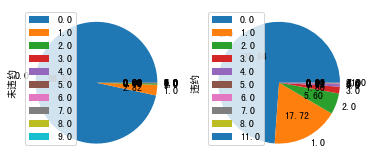

In [24]:
#是否违约与用户在60-89天之内的逾期次数影响关系
t3.T.plot(kind='pie', autopct='%1.2f', subplots=True)
plt.show()

#### 由上图可以看到, 违约和未违约的用户相比较, 在60-89天之内逾期次数为0的用户占到了未违约用户比例的96%, 但仅占违约用户的72%, 表明接近四分之三的违约用户均在60-89天之内有贷款或信用卡逾期, 相同的客户相较于在30-59天之内逾期次数明显增加, 该数据表明, 及时是两个月以前的征信记录也是非常重要的, 能够反映客户的违约倾向.

In [34]:
#替换索引, 用以表明数据类别
stu = ['未违约', '违约']
t4.index=stu
t4

NumberOfTimes90DaysLate,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,17.0
未违约,135230,3478,779,282,96,48,32,7,6,5,3,2,1,2,1,2,0
违约,6701,1765,776,385,195,83,48,31,15,14,5,3,1,2,1,0,1


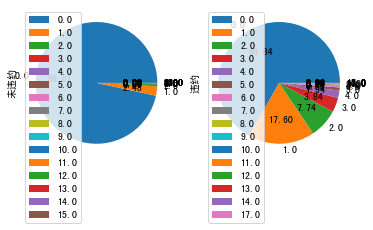

In [26]:
#是否违约与用户在90天以前的逾期次数影响关系
t4.T.plot(kind='pie', autopct='%1.2f', subplots=True)
plt.show()

#### 由上图可以看到, 违约和未违约的用户相比较, 在90天以上逾期次数为0的用户占到了未违约用户比例的96%, 但仅占违约用户的65%, 表明一半以上的违约用户均在90天以上有贷款或信用卡逾期, 相同的客户相较于在60-89天之内逾期次数相差无几, 该数据表明, 及时是三个月以前的征信记录也不可忽视, 能够在一定程度上反映客户的违约倾向.

In [27]:
#是否违约与债务比, 收入情况的影响关系

#无违约用户的收入情况, 查看表格
t5 = df.query("SeriousDlqin2yrs==0")
t5.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,2,0,0.957151,40.0,0.0,0.121876,2600.0,4,0.0,0,0.0,1.0
2,3,0,0.658180,38.0,1.0,0.085113,3042.0,2,1.0,0,0.0,0.0
3,4,0,0.233810,30.0,0.0,0.036050,3300.0,5,0.0,0,0.0,0.0
4,5,0,0.907239,49.0,1.0,0.024926,63588.0,7,0.0,1,0.0,0.0
5,6,0,0.213179,74.0,0.0,0.375607,3500.0,3,0.0,1,0.0,1.0


In [28]:
#无违约用户的收入情况, 计算相同年龄用户的平均月收入
t6 = t5.groupby(['age'])['MonthlyIncome'].mean()
t6.head()

age
21.0    2301.311765
22.0    2253.834171
23.0    2394.521891
24.0    2672.424791
25.0    2962.626202
Name: MonthlyIncome, dtype: float64

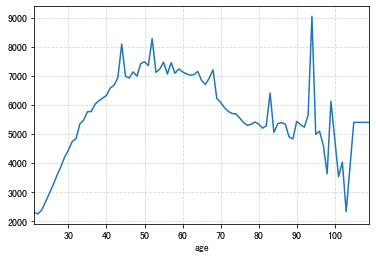

In [29]:
#无违约用户的收入情况, 图表展现
t6.plot(kind='line')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

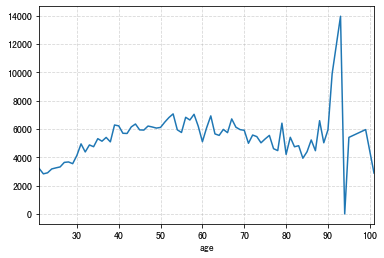

In [30]:
#违约的用户的收入情况
t7 = df.query("SeriousDlqin2yrs==1")
t8 = t7.groupby(['age'])['MonthlyIncome'].mean()
t8.plot(kind='line')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### 由上述两个图片可以看出, 在40-70岁之间的用户中, 违约的用户收入为6000美元左右, 但是无违约的用户的收入大部分分布在6000-8000美元之间, 并且接近或超过8000美元, 收入较为丰厚, 表明无违约的40-70岁用户的经济收入状况良好, 具备一定的还债能力, 在预测用户还款能力时, 可将这部分客户的收入作为比较重要的衡量指标, 从而力保规避风险.

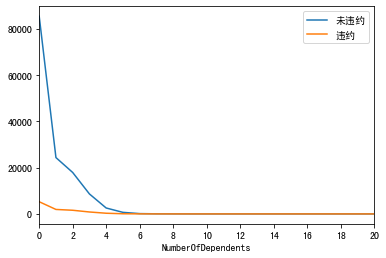

In [31]:
#是否违约与抚养人数的关系情况
t9 = pd.crosstab(df['SeriousDlqin2yrs'], df['NumberOfDependents'])
stu = ['未违约', '违约']
t9.index=stu
t9.T.plot()
x_ticks = range(21)
plt.xticks(x_ticks[::2])
plt.show()

#### 由上述图片可以看出,违约用户需要抚养的人数相对较少, 大多集中在需要抚养0-2人, 相对于未违约用户而言, 其总数量也非常小, 当然这非常有可能是因为在我们选取的样本中, 违约用户相对于未违约用户的占比本身就比较小, 但从另一个方面表明, 未违约的用户中由超过八万人次是不需要抚养他人的, 经济压力较小从而不会成为还贷的阻碍.

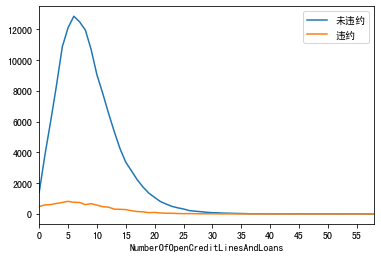

In [32]:
#是否违约与信用贷款和抵押贷款的影响关系
#是否违约与信用贷款的影响关系
t10 = pd.crosstab(df['SeriousDlqin2yrs'], df['NumberOfOpenCreditLinesAndLoans'])
stu = ['未违约', '违约']
t10.index=stu
t10.T.plot()
x_ticks = range(60)
plt.xticks(x_ticks[::5])
plt.show()

#### 由上述图片可以看出,未违约用户中信用贷款为5-10次的用户最多, 而违约用户的信用贷款次数分布并无明显规律.

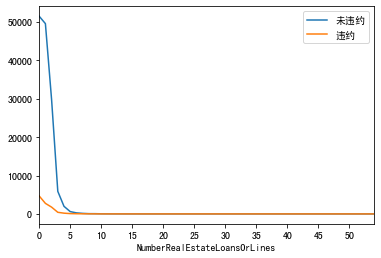

In [33]:
#是否违约与信用贷款和抵押贷款的影响关系
t11 = pd.crosstab(df['SeriousDlqin2yrs'], df['NumberRealEstateLoansOrLines'])
stu = ['未违约', '违约']
t11.index=stu
t11.T.plot()
x_ticks = range(55)
plt.xticks(x_ticks[::5])
plt.show()

#### 由上述图片可以看出,未违约用户中有超过5万的用户并没有任何抵押贷款, 原因之一可能是用户没有可以抵押的固定资产, 也可能是因为用户拥有一定的固定资产, 但是没有较大的资金需求, 不需要抵押贷款.